#  **Predicting the price of a stock using LSTM network**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_train = pd.read_csv('/content/drive/MyDrive/DataSets/Stock_Price_LSTM/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# creating a datastructure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))



In [ ]:
# importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# initialising the RNN
regressor = Sequential()

## Adding the LSTM layers and some Dropout regularization

In [ ]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

## Adding the output layer

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

## Compile the RNN

In [ ]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

## Fit the RNN to the training set

In [ ]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 115ms/step - loss: 0.0378
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0056
Epoch 9/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0046
Epoch 13/100

##Load the stock price data

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/DataSets/Stock_Price_LSTM/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

## Get the predicted stock price

In [ ]:
# Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test =[]
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualizing the results of predicted and real stock price

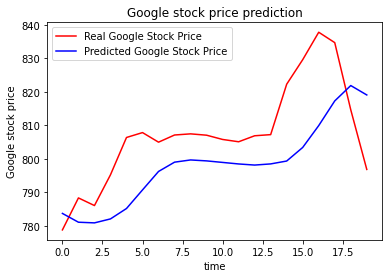

In [ ]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('time')
plt.ylabel('Google stock price')
plt.legend()
plt.show();